In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn
import cv2                  
from tqdm import tqdm
import os                   
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
from random import shuffle
from PIL import Image

In [5]:
import os
path='D:/Education/College/sem 7/Deep Learning/hand/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)


In [7]:

different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)
print("The different classes that exist in this dataset are:")
print(different_classes)

The different classes that exist in this dataset are:
{'04_fist_moved', '02_l', '07_ok', '01_palm', '10_down', '03_fist', '09_c', '08_palm_moved', '06_index', '05_thumb'}


In [8]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2
for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf


*** 04 ***
*** 01 ***
*** 09 ***
*** 00 ***
*** 06 ***
*** 08 ***
*** 05 ***
*** 02 ***
*** 03 ***
*** 07 ***


In [10]:
import matplotlib.cm as cm
import IPython.display

Class Label: 1


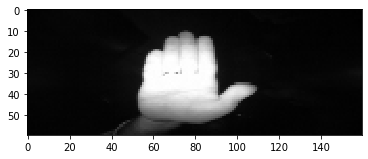

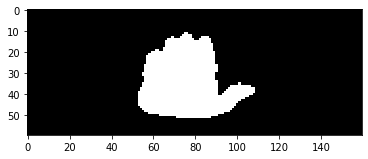

Class Label: 2


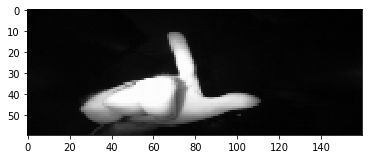

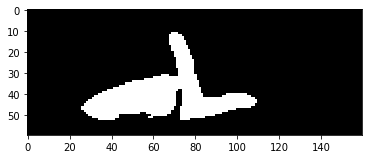

Class Label: 3


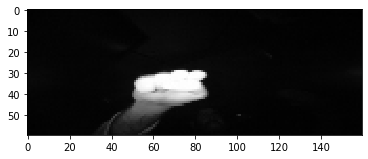

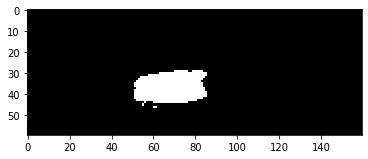

Class Label: 4


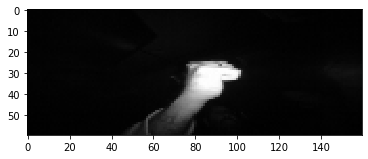

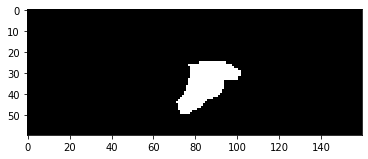

Class Label: 5


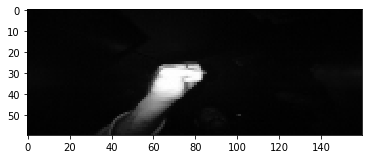

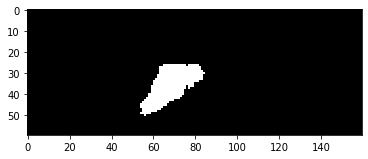

Class Label: 6


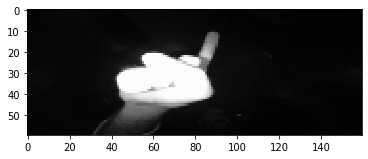

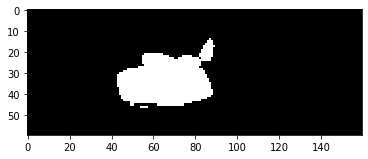

Class Label: 7


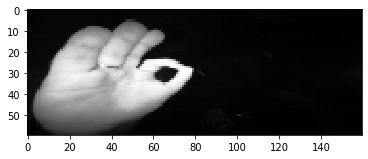

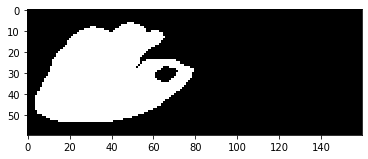

Class Label: 8


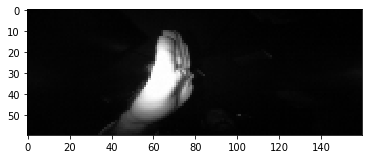

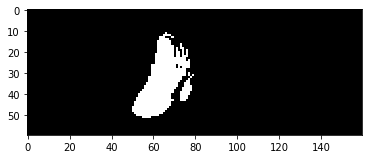

Class Label: 9


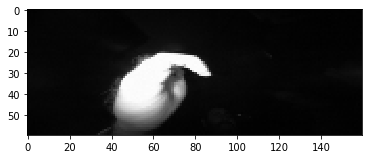

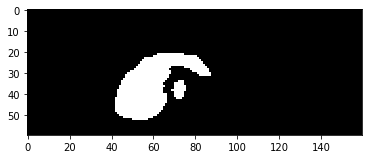

Class Label: 10


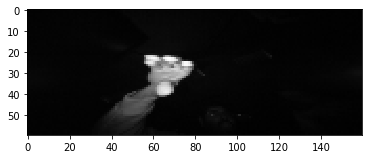

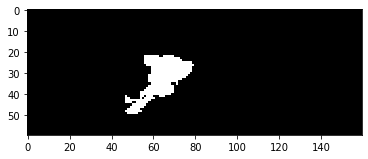

In [11]:
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()

In [12]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [13]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_data=np.array(x_data)
print("Before PCA",x_data.shape)

Before PCA (20000, 9600)


In [15]:
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

print('___________________')
print("After PCA",x_data.shape)

[0.25498139 0.08075452 0.06690615 0.041779   0.03379988 0.03188952
 0.02433627 0.02123843 0.01862449 0.01679004 0.01509599 0.01309636
 0.01163084 0.01093524 0.00949862 0.00920234 0.00874925 0.00804035
 0.00764518 0.00756206]
[1529.79553924  860.91952673  783.6320034   619.23884469  556.97628433
  541.00728367  472.61356719  441.5097674   413.44844398  392.55902706
  372.22881849  346.70044273  326.72674858  316.80594236  295.26324564
  290.62183617  283.3769933   271.6543622   264.89451816  263.4506162 ]
___________________
After PCA (20000, 20)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)
x_train,x_valid,y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.5)

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
#The idea behind StandardScaler is that it will transform your data
#such that its distribution will have a mean value 0 and standard deviation of 1.
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_further)  

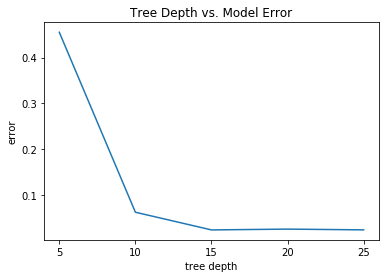

Optimal Tree Depth: 15


In [18]:
from sklearn import tree

# clf = tree.DecisionTreeClassifier(max_depth=15)
# clf = clf.fit(X_train, y_train)

depthValues =  [5,10,15,20,25]
dt_error = []
for depthValue in depthValues:
    model = tree.DecisionTreeClassifier(max_depth=depthValue)
    model = model.fit(X_train, y_train)
    error = 1. - model.score(X_valid, y_valid)
    dt_error.append(error)
plt.plot(depthValues, dt_error)
plt.title('Tree Depth vs. Model Error')
plt.xlabel('tree depth')
plt.ylabel('error')
plt.xticks(depthValues)
plt.show()

minError = dt_error.index(min(dt_error))
bestDepth = depthValues[minError]

print("Optimal Tree Depth: {}".format(bestDepth))

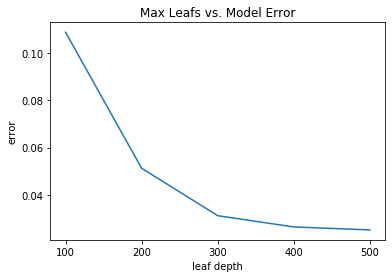

Optimal Max Number of Leaf Nodes: 500


In [19]:
leafValues =  [100,200,300,400,500]
leaf_error = []
for leafValue in leafValues:
    model = tree.DecisionTreeClassifier(max_leaf_nodes=leafValue)
    model = model.fit(X_train, y_train)
    error = 1. - model.score(X_valid, y_valid)
    leaf_error.append(error)
plt.plot(leafValues, leaf_error)
plt.title('Max Leafs vs. Model Error')
plt.xlabel('leaf depth')
plt.ylabel('error')
plt.xticks(leafValues)
plt.show()

minError = leaf_error.index(min(leaf_error))
bestLeaf = leafValues[minError]


print("Optimal Max Number of Leaf Nodes: {}".format(bestLeaf))

In [21]:
clf = tree.DecisionTreeClassifier(max_depth=15, max_leaf_nodes=bestLeaf)
clf = clf.fit(X_train, y_train)

In [22]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.972
Train 0.99925


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
matrix = confusion_matrix(y_further, y_pred_dt)
precision = precision_score(y_further, y_pred_dt, average = None)
accuracy = accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None)
recall = recall_score(y_further, y_pred_dt, average = None)

print("Confusion Matrix:\n", matrix, "\n")
print("Accuracy:", accuracy, "\n")
print("Recall:", recall, "\n")
print("Precision:", precision)

Confusion Matrix:
 [[363   8   0   1   2   0   0   1   0   0]
 [  7 372   1   0   0   3   0   0   1   0]
 [  3   3 411   3   8   2   2   2   2   4]
 [  2   2   3 406   1   0   1   1   3   0]
 [  2   0   2   1 390   2   2   0   0   0]
 [  0   2   4   3   0 396   3   0   2   1]
 [  0   1   1   2   0   5 376   0   0   0]
 [  0   0   0   0   0   0   3 381   0   0]
 [  0   0   1   0   0   1   0   2 406   0]
 [  1   0   1   1   0   1   0   0   2 387]] 

Accuracy: 0.972 

Recall: [0.968      0.96875    0.93409091 0.96897375 0.97744361 0.96350365
 0.97662338 0.9921875  0.9902439  0.98473282] 

Precision: [0.96031746 0.95876289 0.96933962 0.9736211  0.97256858 0.96585366
 0.97157623 0.98449612 0.97596154 0.9872449 ]
